In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.linear_model import LinearRegression

In [5]:
# https://www.kaggle.com/ruslankl/mice-protein-expression/data
df = pd.read_csv('Data_Cortex_Nuclear.csv')
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [10]:
remove_sparse = df.drop([987, 988, 989])
target = remove_sparse['pCAMKII_N']
features = remove_sparse.drop(['MouseID', 'Genotype', 'Treatment', 'Behavior', 'class', 'BCL2_N',
                   'pCFOS_N', 'H3MeK4_N', 'EGR1_N', 'BAD_N', 'H3AcK18_N', 'ELK_N', 'MEK_N', 
                    'Bcatenin_N', 'pCAMKII_N', 'CAMKII_N', 'pS6_N'], axis=1)
feature_columns = features.columns

In [11]:
norm_features = features.copy()
for column in features.columns:
    norm_features[column] = (norm_features[column] - norm_features[column].mean()) /\
                                norm_features[column].std()

In [12]:
norm_features.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCREB_N,pELK_N,pERK_N,...,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,SYP_N,CaNA_N
0,0.312131,0.516974,2.249492,1.494587,2.300094,-0.344380,-0.158307,0.602995,0.690193,0.411232,...,-1.173090,-1.454381,0.220950,-0.865781,-2.132759,-1.117809,-0.178071,-1.307380,-0.286439,1.065234
1,0.356137,0.285970,1.876794,1.417377,1.973104,-0.517166,-0.333903,0.441838,0.359164,0.431793,...,-0.854243,-1.118116,0.496359,-0.906097,-2.070143,-1.319724,0.010357,-0.908911,-0.068686,1.279274
2,0.334345,0.449630,2.009197,1.122775,1.905610,-0.580221,-0.226470,0.542328,0.284072,0.380657,...,-0.205367,-1.194374,0.463405,-0.858103,-2.134337,-1.394720,-0.016893,-1.140676,-0.155962,1.855077
3,0.065353,-0.000103,0.800636,0.488573,1.216985,-0.246965,-0.199091,-0.170918,0.356400,0.108230,...,-1.172623,-1.335614,-0.256738,-1.092073,-1.651043,-1.432823,-0.159772,-1.194923,-0.818837,1.143695
4,0.036614,0.001303,0.804198,0.197285,0.937461,-0.481864,-0.303951,-0.626507,0.161806,0.014642,...,-0.561298,-1.313297,-0.054648,-0.888418,-1.665882,-1.389384,0.323064,-0.729522,-0.180366,1.582017


In [13]:
model_df = pd.concat([norm_features, target], axis=1)

In [14]:
train, test = train_test_split(model_df, test_size=0.2, random_state=42)

In [15]:
X_test = test[feature_columns]
Y_test = test['pCAMKII_N']
X_train = train[feature_columns]
Y_train = train['pCAMKII_N']

In [16]:
regr = LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
# https://stackoverflow.com/questions/34649969/how-to-find-the-features-names-of-the-coefficients-using-scikit-linear-regressio
#print(list(zip(regr.coef_, feature_columns)))
#print('\nCoefficients: \n', regr.coef_)
#print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_test, Y_test))


R-squared:
0.8482795158424881


In [21]:
knn = neighbors.KNeighborsRegressor(n_neighbors=2, weights='distance')
knn.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='distance')

In [22]:
print('\nR-squared:')
print(knn.score(X_test, Y_test))


R-squared:
0.9747409850149928


### Challenge Description
At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. Submit a link to your notebook below.

The KNN model performs a good deal better than linear regression as measured by $R^2$ in this case. However, that isn't to say that the linear regressions performs poorly, and there may be more optimizations to do for linear regression. In particular, it's likely the case that it would perform well on far reduced set of columns, and would also provide us with insight into which genes are related with which other ones. The KNN model can't give us any such inferential ability. Thus, if our concern is purely prediction, we should go with our weighted KNN model, but if we're concerned more with inference, our linear regression (with further tuning and feature pruning) would be the best way to go.

As for why the KNN model performs better, the most obvious place to look is non-linearities. However, as seen in the appendix, there is no obvious source of non-linearity between our dependent variable and our independent variable in 2-dimensional plots. But, this is not the end of the story, as genetic systems are regarded as complex interweaving systems. It is likely there is non-linearity hidden in the interaction between 2 or more independent variables and the dependent variable which our plots will not capture. This would likely explain why linear regression is not able to perform as well. 

It is a bit surprising that with this amount of features and what looks like a relatively small amount of data that KNN is able to perform so well, but it might be that the range of reasonable genetic expressions tend to cluster. 

### Appendix: Scatter Plots

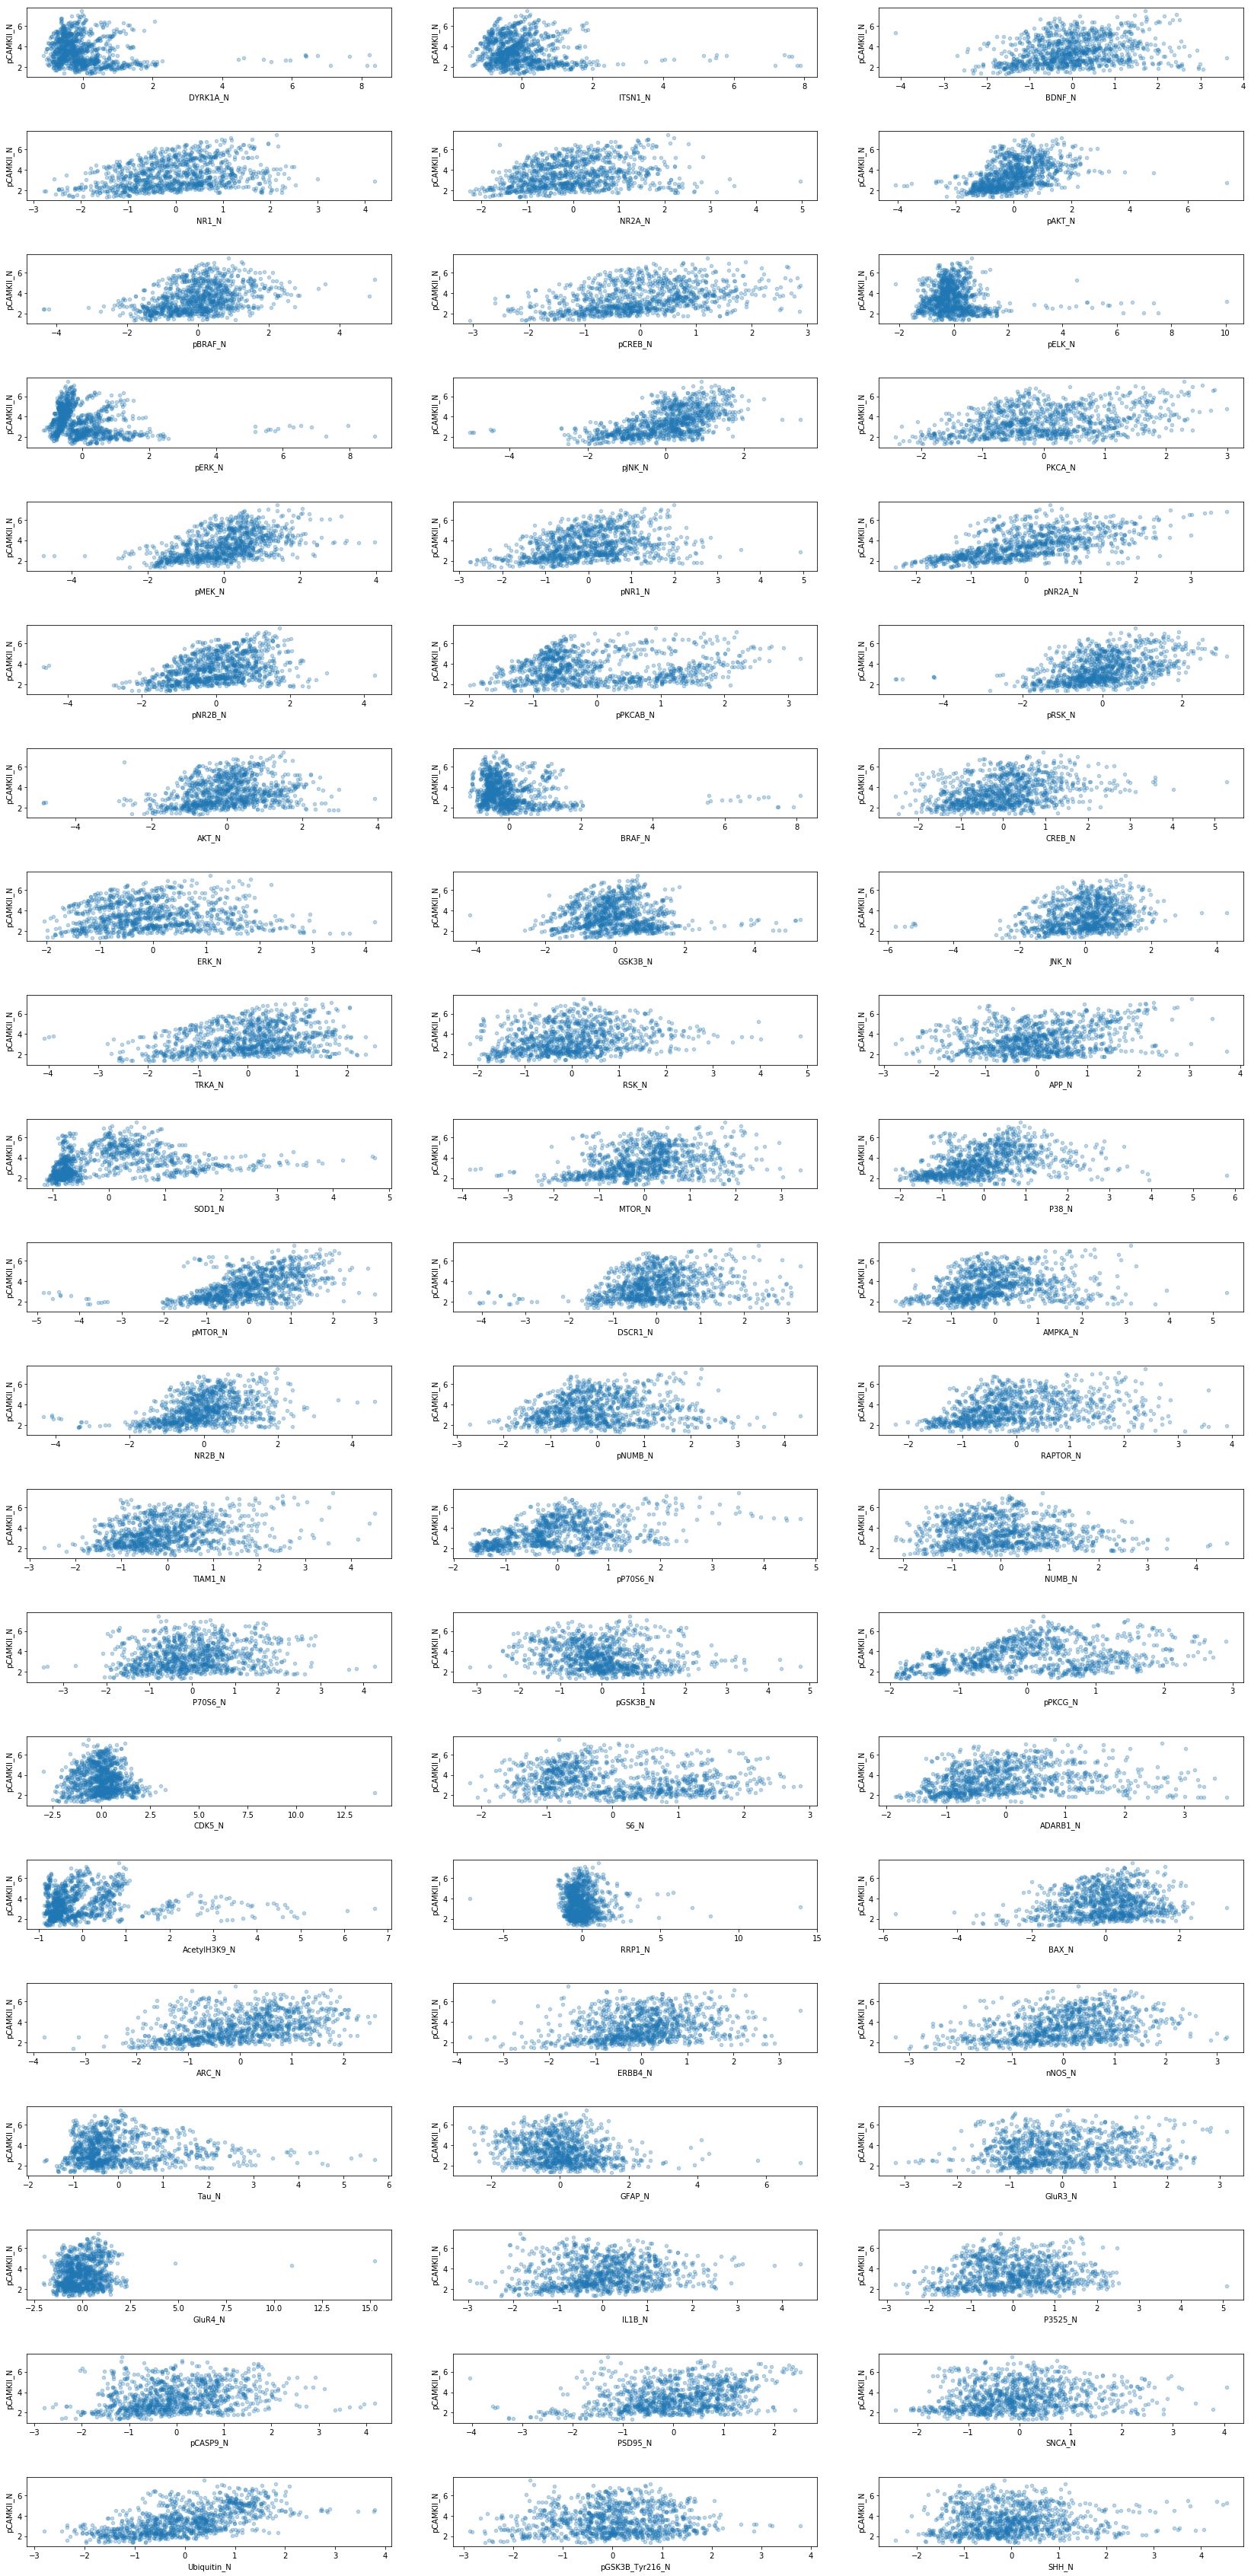

In [27]:
fig, axes = plt.subplots(len(feature_columns)//3, 3, 
                         figsize=(24, 48))
plt.tight_layout(pad=5, w_pad=5, h_pad=5)
for col, axis in zip(feature_columns, axes.flatten()):
    model_df.plot.scatter(x=col, y='pCAMKII_N', ax=axis, alpha=0.3)